# Exploration of the Henon Map

This files contains codes that decide whether a given (a0, b0) and (a+, b+) pair will illustrate R-tipping under a given parameter drift, with the protocol starting from s=0. It also contains the source codes to generate the figures (with lower resolution as demos). 

Note: 
- (a_i, b_i) refers to the initial/start parameter pair: (a0, b0) in the zero-start protocol; or (a-, b-) in the infinite-start protocol;
- (a_f, b_f) refers to then final/end parameter pair: (a+, b+).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import src.henon_functions as hf

## Tip or Track
Codes to decide whether a given (a0, b0) and (a+, b+) will tip or track under the linear parameter dift (Eq.(13)) Lambda with a rate r

In [2]:
a_i, b_i = 0.2, 0.25 
a_f, b_f = 1.38, -0.54 
r_ls = [1.5, 3.5, float('inf')]

x0, y0 = hf.direct_compute_stable_fixed_point(a_i, b_i)

for r in r_ls:
    is_tipping = hf.r_inducing_tipping(hf.linear_path0, a_i, b_i, a_f, b_f, r, x0, y0) #linear_path0, protocol s >= 0
    if is_tipping is True:
        result = 'tip to infinity'
    elif is_tipping is False:
        result = 'track'
    elif is_tipping is None:
        result = 'tip to other orbits'
    print(f'''
    (a0, b0) = ({a_i}, {b_i}), (a+, b+) = ({a_f}, {b_f}), r = {r}:
    {result}\n
    ''')


    (a0, b0) = (0.2, 0.25), (a+, b+) = (1.38, -0.54), r = 1.5:
    track

    

    (a0, b0) = (0.2, 0.25), (a+, b+) = (1.38, -0.54), r = 3.5:
    tip to infinity

    

    (a0, b0) = (0.2, 0.25), (a+, b+) = (1.38, -0.54), r = inf:
    tip to infinity

    


# R-tipping Region in the Parameter Space
The stable region and the R-tipping regions in the parameter space (Fig.4a, Fig.5).

- hf.find_fp_possible_r_tipping_ab_parallel(): fixed (a0, b0), varying (a+, b+)

- hf.find_fp_possible_r_tipping_ab_parallel_reverse(): fixed (a+, b+), varying (a-, b-)

In [3]:
import pandas as pd
from pathlib import Path
from matplotlib.patches import Patch

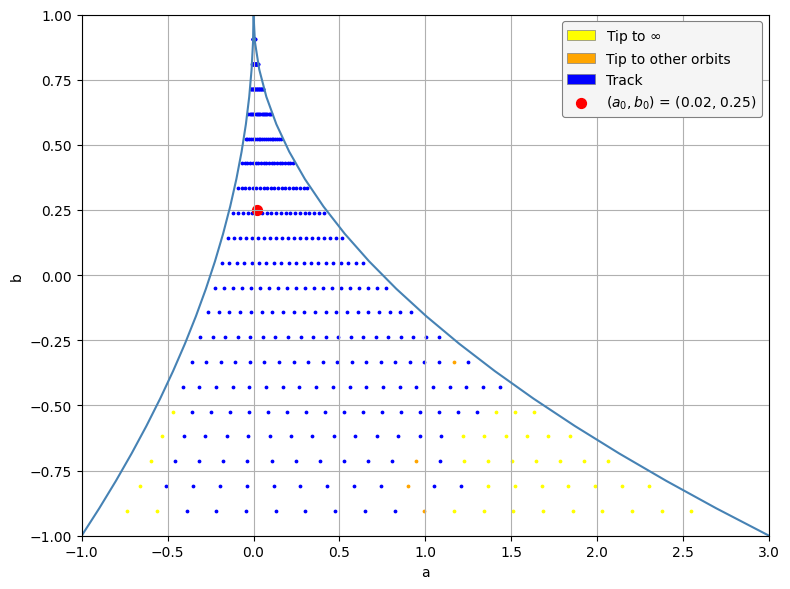

In [4]:
# --- parameters ---
a_fix, b_fix = 0.02, 0.25 # fixed (ai, bi)
# a_fix, b_fix = 1.38, -0.54 # fixed (af, bf) # for convenience label (af, bf)


# --- Generate parameter region boundary ---
# resolution = 4000 # resolution used in the paper - take long time to run
# resolution = 150 # resolution used in the demo
resolution = 20 # fast test here
b_min = -1
b_max = 1
b_vals = np.linspace(b_min, b_max, resolution) 

b = -1

a_min = -(1 - b)**2 / 4
a_max = 3 * (1 - b)**2 / 4

# --- 3. Compute tipping list from your function ---
# a_min=None, a_max=None because we want the whole parameter space, even though we have computed it
tipping_infty_dict, converge_dict, none_dict, notSufficient_dict = hf.find_fp_possible_r_tipping_ab([(a_fix, b_fix)], b_min=b_min, b_max=b_max, 
                                                                                                    a_min=None, a_max=None, n_b=resolution, n_a=resolution) # fixed ai, bi
# tipping_infty_dict, converge_dict, none_dict, notSufficient_dict = hf.find_fp_possible_r_tipping_ab_reverse([(a_fix, b_fix)], b_min=b_min, b_max=b_max, 
#                                                                                                     a_min=None, a_max=None, n_b=resolution, n_a=resolution) # fixed af, bf

tipping_infty_list = tipping_infty_dict.get((a_fix, b_fix), [])
none_list = none_dict.get((a_fix, b_fix), [])
converge_list = converge_dict.get((a_fix, b_fix), [])
notSufficient_list = notSufficient_dict.get((a_fix, b_fix), [])

# print("None dict:", none_dict)

# --- Extract tipping to points directly ---
if tipping_infty_list:
    a_tip_infty, b_tip_infty = zip(*tipping_infty_list)
else:
    a_tip_infty, b_tip_infty = [], []

# --- Extract ambiguous none points directly ---
if none_list:
    a_none, b_none = zip(*none_list)
else:
    a_none, b_none = [], []

# --- Extract converge points directly ---
if converge_list:
    a_converge, b_converge = zip(*converge_list)
else:
    a_converge, b_converge = [], []

# -- not sufficient list --
if notSufficient_list:
    a_notSufficient, b_notSufficient = zip(*notSufficient_list)
else:
    a_notSufficient, b_notSufficient = [], []

# # --- save data ---
# def to_block(a, b, label):
#     return pd.DataFrame({"category": label, "a": list(a), "b": list(b)})

# df = pd.concat([
#     to_block(a_tip_infty, b_tip_infty, "t"),
#     to_block(a_none, b_none, "n"),
#     to_block(a_converge, b_converge, "c"),
#     to_block(a_notSufficient, b_notSufficient, "ns")
# ], ignore_index=True)

# file = Path(f"0data/rTipParaLowResolution_af{a_fix:.3f}bf{b_fix:.3f}.csv")
# comment_line = (
#     f"# (a_i, b_i) = ({a_fix:.3f}, {b_fix:.3f})\n"
#     f"# resolution: {resolution}\n"
#     "# category labels: t=tipping, n=none(tip to periodic attractors), c=converge, ns=notSufficient\n"
#     "# load method: df = pd.read_csv('xxx.csv', comment='#')\n"
#     "# protocol s >=0\n"
#     # "# protocol s -> infty\n"
#     # "use a same example as the 0 protocol in 0data folder, but now use -infty protocol instead\n"
# )
# file.write_text(comment_line)          # write top comment
# df.to_csv(file, mode="a", index=False) # append dataframe


# --- Plot ---
plt.figure(figsize=(8, 6))
patch_handles = [] #collect patch legend
pt_handles = []
# dot_size = 0.02
# dot_size = 1
dot_size = 3

# Tipping points in darkseagreen
if a_tip_infty:
    plt.scatter(a_tip_infty, b_tip_infty, color='yellow', s=dot_size)
    patch_handles.append(Patch(facecolor='yellow', edgecolor='grey', linewidth=0.5, label=r'Tip to $\infty$'))

# None (ambiguous) points in orange
if a_none:
    plt.scatter(a_none, b_none, color='orange', s=dot_size)
    patch_handles.append(Patch(facecolor='orange', edgecolor='grey', linewidth=0.5, label='Tip to other orbits'))


# Converge points in red
if a_converge:
    plt.scatter(a_converge, b_converge, color='blue', s=dot_size)
    patch_handles.append(Patch(facecolor='blue', edgecolor='grey', linewidth=0.5, label='Track'))


# not sufficient points
if a_notSufficient:
    plt.scatter(b_notSufficient, a_notSufficient, color='lightgrey', s=dot_size)
    patch_handles.append(Patch(facecolor='lightgrey', edgecolor='grey', linewidth=0.5, label='Not sufficient'))

# Selected point in black
pt = plt.scatter([a_fix], [b_fix], s=50, color="red", marker='o', label=rf"($a_0, b_0$) = ({a_fix:.2f}, {b_fix:.2f})") # fixed a_i, b_i
# pt = plt.scatter([a_fix], [b_fix], s=50, color="red", marker='^',label=rf"($a_+, b_+$) = ({a_fix:.2f}, {b_fix:.2f})") # fixed a_f, b_f
pt_handles.append(pt) 


# Boundary curves
b_plot = np.linspace(-1, 1, resolution)
a_upper = 3 * (1 - b_plot)**2 / 4
a_lower = - (1 - b_plot)**2 / 4

plt.plot(a_upper, b_plot, color='steelblue', label=r'$a = \frac{3(1-b)^2}{4}$')
plt.plot(a_lower, b_plot, color='steelblue', label=r'$a = -\frac{(1-b)^2}{4}$')
# plt.axvline(x=0, color='brown', linestyle='--', linewidth=1, label=r'$a \neq 0$') # a \ne 0

# styling
plt.xlabel('a')
plt.ylabel('b')

plt.xlim([a_min, a_max])
plt.ylim([b_min, b_max])

# line_handles, line_labels = plt.gca().get_legend_handles_labels()
# leg = plt.legend(handles=line_handles + patch_handles + pt_handles, loc="upper right")
leg = plt.legend(handles=patch_handles + pt_handles, loc="upper right")
frame = leg.get_frame()
frame.set_facecolor("whitesmoke")   # same background
frame.set_edgecolor("grey")         # same border color
frame.set_linewidth(0.8)            # same border thickness
frame.set_alpha(1.0)                # fully opaque   

plt.grid(True)
plt.tight_layout()

plt.show()

# plt.savefig(f'rTipParaPlot_a{a_i:.3f}b{b_i:.3f}.png', dpi=300, bbox_inches='tight')
# plt.close('all')

## Fractal Boundaries (F1, F2, F3)
Fig.6(a)

Give a set of boundary points (basin, parameter space, rate space), figure out all the labels, so that we can visualise the phi dependence. 

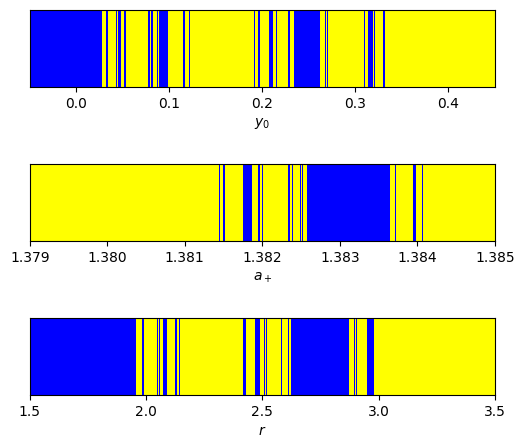

In [7]:
a_i, b_i = 0.2, 0.25 # protocol 0
a_f, b_f = 1.38, -0.54 #fractal
# a_f, b_f = -0.68, -0.75 #smooth

# RESOLUTION = 30000 # resolution for the paper
RESOLUTION = 1000

x_i, y_i = hf.direct_compute_stable_fixed_point(a_i, b_i) 

# --- plot the heat maps bar ---
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 5), gridspec_kw={'hspace': 1}, squeeze=False)

ax_basin = axes[0, 0]
ax_para = axes[1, 0]
ax_r = axes[2, 0]

# --- basin --- 
x_fixed = -0.2 # fractal
y_min, y_max = -0.05, 0.45 

# x_fixed = 0.5 # smooth
# y_min, y_max = -0.12, 0 

y_space = np.linspace(y_min, y_max, RESOLUTION)
labels_basin = hf.find_numeric_label_ls(y_space, x_fixed, 
                                    x_i, y_i,
                                    a_i, b_i, a_f, b_f, 
                                    'basin')    

ax_basin = hf.plot_frac_bar(labels_basin, y_min, y_max, ax=ax_basin)
ax_basin.set_xlabel(r'$y_0$')
# ax_basin.set_ylabel('Basin boundary\n' + r'(fixed $x$)')

patch_out_basin = mpatches.Patch(facecolor='yellow', edgecolor='grey', linewidth=0.5, label=r'Tip to $\infty$')
patch_in_basin = mpatches.Patch(facecolor='blue', edgecolor='grey', linewidth=0.5, label='Track')

leg_basin = ax_basin.legend(handles=[patch_out_basin, patch_in_basin], loc="upper right", frameon=True)

# --- Parameter Space ---
b_fixed = -0.54 # fractal - fixed (a0,b0)
a_min, a_max = 1.379, 1.385 #fractal


# b_fixed = - 0.75  # smooth - fixed (a0,b0)
# a_min, a_max = -0.7, -0.5

a_space = np.linspace(a_min, a_max, RESOLUTION)   

x_i, y_i = hf.direct_compute_stable_fixed_point(a_i, b_i)  

labels_para = hf.find_numeric_label_ls(a_space, b_fixed, 
                                    x_i, y_i, a_i, b_i,
                                    a_f, b_f,  
                                    'para')

ax_para = hf.plot_frac_bar(labels_para, a_min, a_max, ax=ax_para)
ax_para.set_xlabel(r'$a_+$')
# ax_para.set_ylabel('Parameter space\n' + r'(fixed $b$)')

patch_tipping_para = mpatches.Patch(facecolor='yellow', edgecolor='grey', linewidth=0.5, label=r'Tip to $\infty$')
patch_converge_para = mpatches.Patch(facecolor='blue', edgecolor='grey', linewidth=0.5, label='Track')

leg_para = ax_para.legend(handles=[patch_tipping_para, patch_converge_para], loc="upper right", frameon=True)

# --- Rate Space ---
r_fixed = None
r_min, r_max = 1.5, 3.5 # smooth to fractal
# r_min, r_max = 0.2, 0.44 # smooth to smooth

r_space = np.linspace(r_min, r_max, RESOLUTION)
labels_r = hf.find_numeric_label_ls(r_space, r_fixed, 
                                    x_i, y_i,
                                    a_i, b_i, a_f, b_f, 
                                    'r')

ax_r = hf.plot_frac_bar(labels_r, r_min, r_max, ax=ax_r)
ax_r.set_xlabel(r'$r$')
# ax_r.set_ylabel('r space\n' + '(linear path)')

patch_tip_r = mpatches.Patch(facecolor='yellow', edgecolor='grey', linewidth=0.5, label=r'Tip to $\infty$')
patch_noTip_r = mpatches.Patch(facecolor='blue', edgecolor='grey', linewidth=0.5, label='Track')

leg_r = ax_r.legend(handles=[patch_tip_r, patch_noTip_r], loc="upper right", frameon=True)

# set legend frame and background color
legends = [leg_para, leg_basin, leg_r]
for leg in legends:
    frame = leg.get_frame()
    frame.set_facecolor("whitesmoke")   # solid white
    frame.set_edgecolor("grey")
    frame.set_linewidth(0.8)
    frame.set_alpha(1.0)       

# # set ticks
# ax_para.xaxis.set_major_locator(MultipleLocator(0.01))
# ax_basin.xaxis.set_major_locator(MultipleLocator(0.05))
# ax_r.xaxis.set_major_locator(MultipleLocator(0.1))

# -- no legend --
leg_para.remove()
leg_basin.remove()
leg_r.remove()

# -- font size --
plt.rcParams['xtick.labelsize'] = 14 # ticks size
# plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 16 # label text size

# -- show or save the result --
# fig.suptitle("Fractal Structure Comparison", fontsize=14)
plt.show()

**End of File**